In [6]:
import requests
try:
    one_o_four_page_crawler('https://www.1040.com.tw/job/?jobno=5edsi&jobsource=104_hotorder')
except requests.ConnectionError:
    print('something')

something


In [1]:
def one_o_four_page_crawler(url): #爬取單職缺的資訊
    """
    Input:
           url -> https://www.104.com.tw/job/?jobno=5edsi&jobsource=104_hotorder
    
    Output:
           article_dict -> {'url': "https://www.104.com.tw/job/?jobno=5edsi&jobsource=104_hotorder",
                            'title': "資深後端工程師",
                            'company': "104人力銀行_一零四資訊科技股份有限公司",
                            'update_tm': "2017-04-12"
                            'job_catagories': ["軟體設計工程師","Internet程式設計師"],
                            'content': "104致力於讓台灣職場更好，歡迎有熱情有想法的工程師加入我們~
                                        主要負責工作內容如下：
                                        1.人力銀行主要網站功能架構設計及開發實作，以PHP及java開發為主
                                        2.建置及維護核心元件，以soap api或restful api為主
                                        3.軟體工程最佳實踐，如單元測試,自動化測試,code review,code refactoring。
                                        4.提供產品Owner工程評估及建議
                                        5.日常網站營運及維護",
                            'required_numbers': "3 人"
                            'tools': [C,C++,Java,PHP,JavaScript,HTTP,TCP/IP]
                            'skills': ["軟體程式設計", "結構化程式設計", "網路程式設計"]
                            'addition': "1.具豐富物件導向設計與實作經驗和技術。
                                         2.紮實的coding和debugging技術和經驗。(Java, C, C++, PHP, JavaScript任一)
                                         3.熟知網路相關協議(TCP, HTTP/HTTPS)並有實務開發經驗。
                                         4.熟悉Linux/Unix環境，包括shell script。
                                         5.熟悉 MySQL並具備資料庫設計能力。
                                         6.有AWS(Amazon Web Services)實作及瞭解CI (Continuous Integration)、CD 
                                         (Continuous Deployment)開發經驗尤佳"}
    
    """
    import requests
    from bs4 import BeautifulSoup
    import json
    import lxml
    import time
    count = 0
    success = 0
    article_dict = {} #設定輸出dict
#     url = "https://www.104.com.tw/job/?jobno=5edsi&jobsource=104_hotorder"
    res = requests.get(url) #連線
    
    soup = BeautifulSoup(res.text, 'lxml') #轉ＢＳ格式後依緒把所需資料找出放入dict
    article_dict['title'] = soup.select("#job > article > header > div > h1")[0].text.split()[0] 
    article_dict['company'] = soup.select("#job > article > header > div > h1")[0].text.split()[1]
    main_class = soup.select('#job > article > div.grid-left > main')[0]
    article_dict['content'] = main_class.select('div > p')[0].text
    article_dict['required_numbers'] = main_class.select('dl > dd')[9].text
    job_catagories = []
    for span in main_class.select('span'):
        if (len(span.text) > 0) and ((span.text) != '英文'):
            job_catagories.append(span.text)
    article_dict['job_catagories'] = job_catagories
    main_class.select_one('.info').decompose()
    article_dict['tools'] = main_class.select('.tool')[0].text.split('、')
    article_dict['skills'] = main_class.select('.tool')[1].text.split('、')
    article_dict['addition'] = main_class.select('dd')[-2].text
    article_dict['update_tm'] = main_class.select('time')[0].text.split('：')[-1]
    jdata = json.dumps(article_dict,ensure_ascii=False) #把dict轉成json格式較易輸出於檔案

    return jdata

In [4]:
def one_o_four_url_crawler(HOST,page): #輸入網址 取得該頁的所有連結
    """
    Input:
           104 area_code -> 6001001000(台北) page->1
    
    Output:
           article_dict -> [['菁英儲備幹部_台北板橋 /江子翠（底薪3萬起）C',
                             'https://www.104.com.tw/job/?jobno=4htcv&jobsource=104_hotorder'],
                            ['網路廣告AE(周休三日 高獎金)',
                             'https://www.104.com.tw/job/?jobno=4620x&jobsource=104_hotorder'],
                            ['不需日曬雨淋-線上遊戲客服專員(內勤)',
                             'https://www.104.com.tw/job/?jobno=58eec&jobsource=104_hotorder'],
                            ['前端開發工程師', 'https://www.104.com.tw/job/?jobno=5cxh7&jobsource=104_hotorder'],
                            ['資深軟體開發技術經理(緊急招聘)',
                             'https://www.104.com.tw/job/?jobno=5df7p&jobsource=104_hotorder'],
                            ['業務助理(執行專員)(簡報能力佳者優先錄用)',
                             'https://www.104.com.tw/job/?jobno=4zl32&jobsource=104_hotorder'],
                            ['程式設計師', 'https://www.104.com.tw/job/?jobno=42mmc&jobsource=104_hotorder'],
                            ['網站工程師', 'https://www.104.com.tw/job/?jobno=5ea2v&jobsource=104_hotorder'],
                            ['[台北內科]PHP/HTML/JAVASCRIPT網站設計工程師',
                             'https://www.104.com.tw/job/?jobno=5bgh8&jobsource=104_hotorder'],
                            ['軟體程式工程師', 'https://www.104.com.tw/job/?jobno=4twky&jobsource=104_hotorder'],
                            ['品牌文案人員',
                             'https://www.104.com.tw/job/?jobno=5fyz2&jobsource=104_bank1&hotjob_chr='],
                            ['品牌影音製片專員',
                             'https://www.104.com.tw/job/?jobno=5fyz3&jobsource=104_bank1&hotjob_chr='],
                            ['品牌美編專員',
                             'https://www.104.com.tw/job/?jobno=5fyz5&jobsource=104_bank1&hotjob_chr='],...]
    
     """
    import requests
    from bs4 import BeautifulSoup
    import time
#     start_time = time.time()
    hrefs = []
    url = HOST + page #連線
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    select_con = '#jl_page' + page #尋找連線網址列
    links = soup.select(select_con)[0].select('div.jobname_summary')
    links[0].select('a')[0]['href']           
#     print('page' + page)
    for link in links: #把網址跟title儲存在一個list內
        if link.select('a')[0]['href'] != 'javascript:void(0)':
            href = 'https://www.104.com.tw' + link.select('a')[0]['href']
            hrefs.append([link.text.strip(), href])            
#     elapsed_time = time.time() - start_time #計算爬取時間
#     print(str(int(elapsed_time//60)) + 'min' + str(elapsed_time%60) + 'sec')
    return hrefs

In [7]:
# 找職缺內的所有職缺，並爬取職缺內的內容
# 流程：找到所有職缺網頁，迭代網址最後的url page
# 每取得十頁的職缺列表進行一次內容爬取並寫入檔案
import time
import sys
import requests
from bs4 import BeautifulSoup
start_time = time.time()
# HOST = 'https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001000&order=2&asc=0&page='
# HOSTS = ['https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001001&order=2&asc=0&page=',
#        'https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001002&order=2&asc=0&page=',
#        'https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001003&order=2&asc=0&page=',
#        'https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001004&order=2&asc=0&page=',
#        'https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001005&order=2&asc=0&page=']
HOSTS = ['https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001004&order=2&asc=0&page=',
       'https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&indcat=1001001005&order=2&asc=0&page=']

for HOST in HOSTS:
    total = 0
    page = '1'
    url = HOST + page #連線
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    total_turns = int(int(soup.select('#joblist_selectall > div.joblist_bar > ul')[0].text.split()[1])/200)
    turns = range(0,total_turns)
    for turn in turns:
        pages = range(turn*10+1,turn*10+11)
        hrefs = []
        pages_content = []
        previous_href = 0
        breakk = False
        connection_false = []
        for page in pages:
            page = str(page)
            count = 0
            connection = 0
            while (connection == 0 and count<4):
                try:
                    time.sleep((count * 1))
                    href = one_o_four_url_crawler(HOST,page)
                    print('page',page)
                    if (href == previous_href):
                        print('crawl end on page',page)
                        elapsed_time = time.time() - start_time #計算爬取時間
                        print(str(int(elapsed_time//60)) + 'min' + str(elapsed_time%60) + 'sec')
                        breakk = True
                        break
                    connection = 1
                    hrefs.append(href)
                    previous_href = href
                    total += len(href)
                    for link in href:
                        try:
                            jdata = one_o_four_page_crawler(link[1])
                            pages_content.append(jdata)
                        except KeyboardInterrupt:
                            breakk = True
                        except:
                            print('error reading', href)

                except KeyboardInterrupt:
                    breakk = True
                except:
                    print('error reading page',page, count+1 ,'times')
                    count = count + 1
                    if (count ==4):
                        print('\n','CANNOT READ PAGE',page,'\n')
                        connection_false.append(HOST+page)
            if breakk:
                break
        if breakk:
                break


        for data in pages_content:
            with open('./data/one_o_four_data_0510.csv', 'a+') as f:
                f.write(data+'\n')


page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10
page 11
page 12
page 13
page 14
page 15
page 16
page 17
page 18
error reading [['國內通路業務', 'https://www.104.com.tw/job/?jobno=46q7i&jobsource=104_bank1&hotjob_chr='], ['硬體研發工程師', 'https://www.104.com.tw/job/?jobno=4ifot&jobsource=104_bank1&hotjob_chr='], ['資深國外業務', 'https://www.104.com.tw/job/?jobno=4rg52&jobsource=104_bank1&hotjob_chr='], ['專案經理', 'https://www.104.com.tw/job/?jobno=55o1b&jobsource=104_bank1&hotjob_chr='], ['Senior Firmware Engineer (Embedded OS)', 'https://www.104.com.tw/job/?jobno=595g3&jobsource=104_bank1&hotjob_chr='], ['ERP資訊工程師', 'https://www.104.com.tw/job/?jobno=5dayj&jobsource=104_bank1&hotjob_chr='], ['資深Android軟體工程師', 'https://www.104.com.tw/job/?jobno=5ezen&jobsource=104_bank1&hotjob_chr='], ['動畫藝術設計師', 'https://www.104.com.tw/job/?jobno=4ifxn&jobsource=104_bank1&hotjob_chr='], ['業務人員/廣告AE(1)', 'https://www.104.com.tw/job/?jobno=30phq&jobsource=104_bank1&hotjob_chr='], ['業務助理', 'https://w

SyntaxError: 'break' outside loop (<ipython-input-7-2a7be8997f51>, line 79)

In [12]:
import json
with open('./data/one_o_four_data_0510.csv','r') as f: #讀出檔案>將檔案由json轉dict
    lines = f.readlines()
json_type = []
for line in lines:
    json1data = json.loads(line)
    json_type.append(json1data)

In [13]:
for job in json_type: #把各項工作的tools類別轉成全部大寫
    tool_temp = []
    for tool in job['tools']:
        tool = tool.upper()
        if tool not in ['EXCEL', 'WORD', 'OFFICE', 'OUTLOOK', 'POWERPOINT']:
            tool_temp.append(tool)
    job['tools'] = tool_temp

In [14]:
aa = 0
tools_dictionary = set() #由各工作的要求技能建構一個程式語言字典
for data in json_type:
    for tool in data['tools']:
        tools_dictionary.add(tool.upper())
#         if tool.upper() == "PYTHON":
#             aa +=1
#             print(aa)
# type(json_type[3]['tools'][0])
# tools_dictionary

In [15]:
import re #判別工作內容中要是有符合程式語言dict的字的話，判別是否原要求tools內是否存在，若無加入
for jobs in json_type:
    tools_list = []
    for word in re.findall('[A-Za-z.+#]+',jobs['content'].split('\n')[0]):
        if word.upper() in tools_dictionary:
            tools_list.append(word.upper())
    if len(tools_list) != 0:
        if len(jobs['tools']) != 0:
            if jobs['tools'][0] == '不拘':
                jobs['tools'] = tools_list
            else:
                for each_tool in tools_list:
                    if each_tool.upper() not in jobs['tools']:
                        jobs['tools'].append(each_tool)

In [16]:
# import csv
from collections import Counter
tool_counter = Counter()
for job in json_type:
    for tool in job['tools']:
        if tool in tool_counter and tool != '不拘':
            tool_counter[tool] += 1
        else:
            tool_counter[tool] = 1
counter_result = tool_counter.most_common(20)
print(counter_result)
# with open('./data/cleaned_data_104_0510.csv','w') as f:
#     wr = csv.writer(f, quoting=csv.QUOTE_ALL)
#     wr.writerow(tool_counter.most_common())

[('HTML', 1179), ('JAVASCRIPT', 1073), ('LINUX', 961), ('JAVA', 926), ('C', 838), ('ADOBE PHOTOSHOP', 773), ('JQUERY', 732), ('C#', 692), ('MYSQL', 655), ('ILLUSTRATOR', 638), ('PROJECT', 603), ('ANDROID', 574), ('MS SQL', 550), ('PHP', 541), ('C++', 529), ('ASP.NET', 508), ('IOS', 493), ('HTTP', 463), ('AJAX', 419), ('ORACLE', 351)]


In [28]:
import csv
labels = []
sizes = []
aa = 0
ss = 0
for tool in counter_result:
    if aa<15:
        labels.append(tool[0])
        sizes.append(tool[1])
    else:
        ss += tool[1]
    aa+=1
    if aa == 20 :
        labels.append('others')
        sizes.append(ss)
data = []        


with open('./data/cleaned_data_104_0510.csv','w') as f:
    wr = csv.writer(f, quoting=csv.QUOTE_ALL)
    for i in range(0, len(labels)):
        wr.writerow([labels[i],sizes[i]])
    

/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


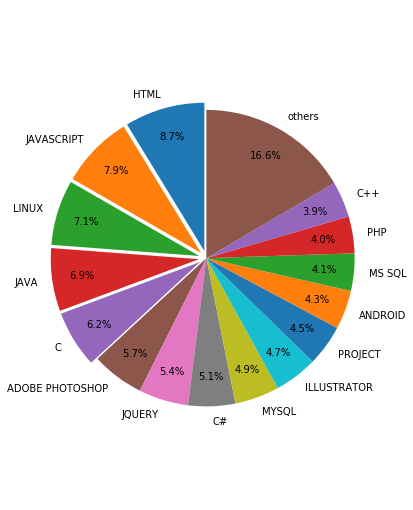

In [54]:
from matplotlib import pyplot as plt

labels = labels 
sizes = sizes
plt.figure(figsize=(10,10))
explode = (0.05,0.05,0.05,0.05,0.05,0,0,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(6,9))
patches,l_text,p_text = plt.pie(sizes, explode=explode, labels=labels,labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.8)
plt.axis('equal')
# plt.legend()
plt.show()

/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


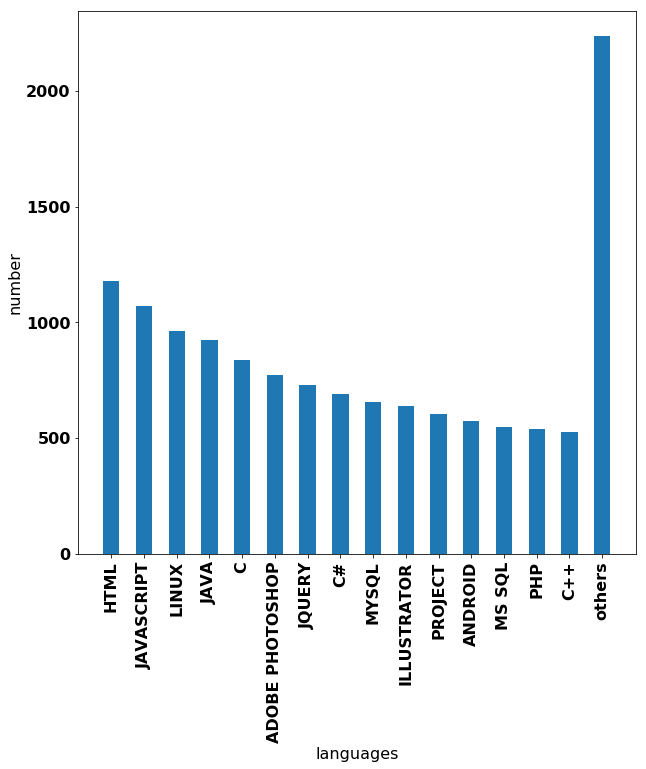

In [59]:
#coding:utf-8
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'size'   : 16}
plt.figure(figsize=(10,10))
plt.rc('font', **font)
plt.xlabel("languages")
plt.ylabel("number")
plt.xticks(range(0,len(labels)),labels,rotation=90)
plt.bar(left = range(0,len(sizes)),height = sizes,width = 0.5)
plt.show()


/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


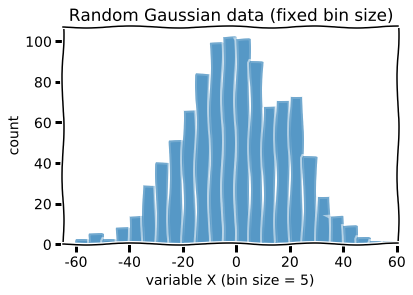

In [153]:
import numpy as np
import random
from matplotlib import pyplot as plt
 
data = np.random.normal(0, 20, 1000)
bins = np.arange(-100, 100, 5) # fixed bin size
 
with plt.xkcd():
    plt.xlim([min(data)-5, max(data)+5])
    plt.hist(data, bins=bins, alpha=0.5)
    plt.title('Random Gaussian data (fixed bin size)')
    plt.xlabel('variable X (bin size = 5)')
    plt.ylabel('count')
 
    plt.show()

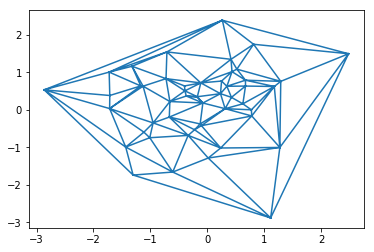

In [152]:
from matplotlib import pyplot as plt
import matplotlib.tri as tri
import numpy as np
 
rand_data = np.random.randn(50, 2)
 
triangulation = tri.Triangulation(rand_data[:,0], rand_data[:,1])
 
plt.triplot(triangulation)
 
plt.show()

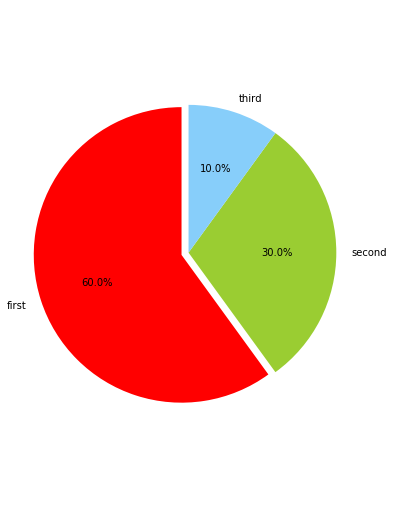

In [133]:
from matplotlib import pyplot as plt 

#调节图形大小，宽，高
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = ['first','second','third']
#每个标签占多大，会自动去算百分比
sizes = [60,30,10]
colors = ['red','yellowgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0.05,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()

In [69]:
i = 0
for job in json_type:
    print(i, job['tools'])
    i += 1

0 ['不拘']
1 ['不拘']
2 ['不拘']
3 ['不拘']
4 ['不拘']
5 ['WINDOWS VISTA', 'WINDOWS XP', 'WINDOWS 7', 'WINDOWS SERVER 2008', 'WINDOWS 8', 'WINDOWS SERVER 2012']
6 ['PROJECT']
7 ['不拘']
8 ['不拘']
9 ['不拘']
10 ['WINDOWS 7', 'PROJECT', 'VISIO']
11 ['WINDOWS 7', 'WINDOWS SERVER 2008', 'WINDOWS SERVER 2012']
12 ['AIX', 'FREEBSD', 'HP-UX', 'LINUX', 'SOLARIS', 'UNIX', 'MICROSOFT EXCHANGE', 'VMWARE', 'CISCO', 'DNS', 'FIREWALL', 'HTTP', 'IDS', 'IIS', 'IPTABLES', 'LDAP', 'ROUTERS', 'SECURITY', 'SNIFFER', 'SSH', 'TCP/IP', 'VPN', 'VISIO']
13 ['DELPHI']
14 ['WINDOWS 7', 'PROJECT']
15 ['不拘']
16 ['PROJECT']
17 ['中文打字50~75']
18 ['WINDOWS 7', 'WINDOWS 8', 'INTERNET EXPLORER']
19 ['不拘']
20 []
21 []
22 []
23 ['中文打字20~50']
24 ['CATIA', 'PRO/E', 'SOLIDWORKS', 'UNIGRAPHICS']
25 ['不拘']
26 ['不拘']
27 ['LINUX', 'AJAX', 'PHP', 'DATABASE ADMINISTRATOR', 'MS SQL', 'MYSQL', 'FTP', 'HTTP']
28 []
29 ['中文打字20~50', '英文打字20~50']
30 ['不拘']
31 ['不拘']
32 ['不拘']
33 ['JAVA', 'JSP', 'TOMCAT', 'JAVASCRIPT']
34 ['不拘']
35 ['不拘']
36 ['ADOBE I

1132 ['不拘']
1133 ['不拘']
1134 ['不拘']
1135 ['不拘']
1136 ['不拘']
1137 ['不拘']
1138 ['不拘']
1139 ['不拘']
1140 ['不拘']
1141 ['不拘']
1142 ['HTML', 'JAVASCRIPT', 'JQUERY']
1143 ['ADOBE PHOTOSHOP', 'ILLUSTRATOR']
1144 ['TCP/IP']
1145 ['INTERNET EXPLORER']
1146 ['不拘']
1147 ['不拘']
1148 ['不拘']
1149 ['不拘']
1150 []
1151 ['不拘']
1152 ['不拘']
1153 ['不拘']
1154 ['AUTOCAD', 'PRO/E']
1155 ['不拘']
1156 ['不拘']
1157 ['不拘']
1158 ['不拘']
1159 ['不拘']
1160 ['不拘']
1161 ['不拘']
1162 ['不拘']
1163 ['不拘']
1164 ['不拘']
1165 ['不拘']
1166 ['不拘']
1167 ['不拘']
1168 ['不拘']
1169 ['不拘']
1170 ['不拘']
1171 ['不拘']
1172 ['不拘']
1173 ['不拘']
1174 ['不拘']
1175 ['不拘']
1176 ['不拘']
1177 []
1178 ['WINDOWS XP', 'WINDOWS 7', 'VISIO']
1179 ['ASP.NET', 'C#', 'VISUAL STUDIO']
1180 ['不拘']
1181 ['ASP.NET', 'C#', 'JAVA', 'VISUAL STUDIO', 'VISUAL STUDIO .NET', 'MS SQL', 'MYSQL', 'HTML', 'JAVASCRIPT', 'XML', 'JQUERY', 'FLEX']
1182 ['WINDOWS 7', 'WINDOWS SERVER 2008', 'WINDOWS SERVER 2012', 'MS SQL', 'MYSQL']
1183 ['DREAMWEAVER', 'FIREWORKS', 'HTML', 'JQUERY', 'AD

1974 ['PROJECT', 'AUTOCAD']
1975 ['PROJECT', 'AUTOCAD', 'AUTOCAD 3D']
1976 ['PROJECT', 'AUTOCAD']
1977 ['不拘']
1978 ['不拘']
1979 ['不拘']
1980 ['不拘']
1981 ['不拘']
1982 ['不拘']
1983 ['不拘']
1984 ['不拘']
1985 ['不拘']
1986 ['LINUX', 'ASP.NET', 'C#', 'PHP', 'VISUAL C#', 'VISUAL STUDIO .NET', 'MS SQL', 'MYSQL', 'ODBC', 'HTML', 'WEB MASTER/DEVELOPER', 'JQUERY']
1987 ['不拘']
1988 ['DREAMWEAVER', 'HTML', 'WEB MASTER/DEVELOPER', 'JQUERY', 'FLASH', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
1989 ['DHTML', 'DREAMWEAVER', 'HTML', 'JQUERY', 'FLASH', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
1990 ['不拘']
1991 ['不拘']
1992 ['不拘']
1993 ['不拘']
1994 ['INTERNET EXPLORER']
1995 ['不拘']
1996 ['不拘']
1997 ['中文打字20~50', '英文打字20~50']
1998 ['LINUX', 'WINDOWS SERVER 2008', 'WINDOWS SERVER 2012']
1999 []
2000 ['中文打字20~50', '英文打字20~50']
2001 []
2002 ['不拘']
2003 []
2004 []
2005 ['中文打字20~50', '英文打字20~50']
2006 []
2007 ['中文打字20~50', '英文打字20~50']
2008 []
2009 []
2010 []
2011 []
2012 []
2013 ['WINDOWS SERVER 2008', 'WINDOWS SERVER 2012', 'CISCO', '

3235 ['不拘']
3236 ['不拘']
3237 ['不拘']
3238 ['VISIO']
3239 ['C', 'C++', 'MATLAB']
3240 []
3241 ['中文打字20~50']
3242 ['LINUX']
3243 ['不拘']
3244 ['不拘']
3245 []
3246 ['不拘']
3247 ['LINUX', 'C']
3248 ['不拘']
3249 ['DOS', 'LINUX', 'WINDOWS 2000', 'WINDOWS 98', 'WINDOWS NT', 'ANDROID', 'C', 'C++', 'VISUAL C++']
3250 ['LINUX', 'C', 'C++']
3251 ['不拘']
3252 ['不拘']
3253 ['不拘']
3254 ['ADOBE ACROBAT', 'PROJECT']
3255 ['LINUX', 'C', 'C++']
3256 ['不拘']
3257 ['不拘']
3258 ['LINUX', 'C', 'C++', 'JAVA', 'HTML']
3259 ['LINUX', 'C', 'C++', 'JAVA']
3260 ['不拘']
3261 ['不拘']
3262 ['LINUX', 'WINDOWS SERVER 2008', 'WINDOWS SERVER 2012', 'C', 'C++', 'JAVA', 'PYTHON']
3263 ['不拘']
3264 ['不拘']
3265 ['不拘']
3266 ['不拘']
3267 ['不拘']
3268 ['INTERNET EXPLORER']
3269 ['不拘']
3270 ['不拘']
3271 ['不拘']
3272 ['不拘']
3273 ['不拘']
3274 ['不拘']
3275 ['不拘']
3276 ['不拘']
3277 ['不拘']
3278 ['WINDOWS XP', 'ANDROID', 'IOS']
3279 ['APPLE', 'WINDOWS XP', 'ANDROID', 'IOS']
3280 ['不拘']
3281 ['中文打字50~75']
3282 ['不拘']
3283 ['ASP.NET', 'C#', 'MS SQL', 'HT

4813 ['DREAMWEAVER', 'HTML', 'ADOBE PHOTOSHOP', 'CORELDRAW', 'ILLUSTRATOR']
4814 ['不拘']
4815 ['JAVA', 'HTML', 'JAVASCRIPT', 'JQUERY']
4816 ['不拘']
4817 ['不拘']
4818 ['不拘']
4819 ['不拘']
4820 ['WPS']
4821 ['VMWARE', 'CISCO', 'FIREWALL']
4822 ['DHTML', 'HTML', 'JAVASCRIPT']
4823 ['中文打字75~100', '英文打字50~75']
4824 ['中文打字75~100', '英文打字75~100']
4825 ['中文打字75~100', '英文打字75~100']
4826 ['中文打字75~100', '英文打字75~100']
4827 ['中文打字75~100', '英文打字75~100']
4828 ['中文打字75~100', '英文打字75~100']
4829 ['中文打字75~100', '英文打字75~100']
4830 ['不拘']
4831 ['JAVA', 'JSP', 'SPRING', 'JAVASCRIPT', 'JQUERY']
4832 ['DHTML', 'HTML', 'JAVASCRIPT']
4833 ['ANDROID', 'IOS', 'JAVA', 'PHP', 'MYSQL', 'ORACLE', 'PL/SQL']
4834 ['不拘']
4835 ['不拘']
4836 ['不拘']
4837 ['不拘']
4838 ['不拘']
4839 ['不拘']
4840 ['不拘']
4841 ['不拘']
4842 ['不拘']
4843 ['不拘']
4844 ['不拘']
4845 []
4846 ['DREAMWEAVER', 'HTML', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
4847 ['不拘']
4848 ['不拘']
4849 ['不拘']
4850 ['LINUX', 'MAC OS', 'ANDROID', 'IOS', 'JAVA']
4851 ['不拘']
4852 ['WINDOWS 7']
4

6414 ['不拘']
6415 ['不拘']
6416 ['不拘']
6417 ['不拘']
6418 ['不拘']
6419 ['HTML', 'ADOBE PHOTOSHOP']
6420 ['HTML', 'JAVASCRIPT', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
6421 ['DREAMWEAVER', 'HTML', 'JAVASCRIPT', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
6422 ['HTML', 'JAVASCRIPT', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
6423 ['JAVA']
6424 ['LINUX', 'AJAX', 'PHP', 'MYSQL', 'JAVASCRIPT', 'WEB MASTER/DEVELOPER', 'JQUERY', 'LAN', 'SECURITY', 'WAN']
6425 ['不拘']
6426 ['JAVA']
6427 ['中文打字20~50']
6428 ['PHP', 'MYSQL', 'JAVASCRIPT', 'JQUERY']
6429 []
6430 ['LINUX', 'AJAX', 'PHP', 'MYSQL', 'JAVASCRIPT', 'WEB MASTER/DEVELOPER', 'JQUERY', 'LAN', 'SECURITY']
6431 ['中文打字20~50']
6432 ['不拘']
6433 ['不拘']
6434 ['不拘']
6435 ['不拘']
6436 ['LINUX', 'AJAX', 'PHP', 'MYSQL', 'JAVASCRIPT', 'WEB MASTER/DEVELOPER', 'JQUERY', 'LAN', 'SECURITY', 'WAN']
6437 ['不拘']
6438 ['LINUX', 'WINDOWS 2000', 'WINDOWS 2003', 'WINDOWS VISTA', 'WINDOWS XP', 'WINDOWS SERVER 2008', 'CISCO', 'JUNIPER']
6439 ['WINDOWS 98', '中文打字20~50']
6440 ['PROJECT', 'VISIO']
64

7982 ['不拘']
7983 ['不拘']
7984 ['不拘']
7985 ['不拘']
7986 ['不拘']
7987 ['不拘']
7988 ['不拘']
7989 ['不拘']
7990 ['不拘']
7991 ['不拘']
7992 ['不拘']
7993 ['不拘']
7994 ['不拘']
7995 []
7996 ['不拘']
7997 ['PHP', 'PYTHON', 'MYSQL', 'JAVASCRIPT']
7998 ['不拘']
7999 ['不拘']
8000 ['不拘']
8001 ['不拘']
8002 ['不拘']
8003 ['不拘']
8004 ['中文打字20~50', '英文打字50~75']
8005 ['RUBY', 'MYSQL', 'HTML', 'JAVASCRIPT']
8006 ['ADOBE ACROBAT', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
8007 ['INTERNET EXPLORER', '中文打字20~50']
8008 ['不拘']
8009 ['不拘']
8010 ['不拘']
8011 ['不拘']
8012 ['不拘']
8013 ['不拘']
8014 ['不拘']
8015 ['不拘']
8016 ['不拘']
8017 ['不拘']
8018 ['不拘']
8019 ['不拘']
8020 ['不拘']
8021 ['不拘']
8022 ['不拘']
8023 ['不拘']
8024 ['不拘']
8025 []
8026 []
8027 ['不拘']
8028 ['WINDOWS XP', 'WINDOWS 7']
8029 ['WINDOWS XP', 'WINDOWS 7', 'ADOBE ACROBAT', 'INTERNET EXPLORER']
8030 ['不拘']
8031 ['WINDOWS XP', 'WINDOWS 7']
8032 ['MYSQL']
8033 []
8034 ['DREAMWEAVER', 'HTML', 'FLASH', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
8035 ['不拘']
8036 ['中文打字50~75']
8037 ['PROJECT']
8038 ['D

8980 ['不拘']
8981 ['LINUX', 'JAVA', 'PHP', 'MYSQL']
8982 ['不拘']
8983 ['不拘']
8984 ['不拘']
8985 []
8986 ['不拘']
8987 ['不拘']
8988 ['不拘']
8989 ['不拘']
8990 ['3DS MAX', 'AFTER EFFECTS', 'MAYA', 'CINEMA 4D', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
8991 ['3DS MAX', 'AFTER EFFECTS', 'MAYA', 'CINEMA 4D', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
8992 ['不拘']
8993 ['PROJECT', 'VISIO', 'LIBREOFFICE WRITER']
8994 ['不拘']
8995 ['ASP.NET', 'C#', 'VISUAL STUDIO', 'MYSQL', 'HTML', 'JAVASCRIPT']
8996 ['AJAX', 'DHTML', 'HTML', 'JAVASCRIPT', 'JQUERY']
8997 ['3DS MAX', 'AFTER EFFECTS', 'ADOBE PHOTOSHOP']
8998 ['APPLE', 'MAC OS', 'MAC/MACINTOSH', 'OS X', 'WINDOWS 7', 'ANDROID', 'IOS', 'ADOBE ACROBAT', '中文打字100~125', '英文打字75~100']
8999 ['APPLE', 'MAC OS', 'MAC/MACINTOSH', 'OS X', 'WINDOWS 7', 'PREMIERE', 'ADOBE PHOTOSHOP', 'FINAL CUT PROX']
9000 ['APPLE', 'MAC OS', 'OS X', 'WINDOWS 7', 'IOS', 'ADOBE ACROBAT', 'INTERNET EXPLORER', '中文打字100~125', '英文打字75~100']
9001 ['PREMIERE', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
9002 ['PREMIERE',

10320 ['不拘']
10321 ['FLASH', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
10322 ['LINUX', 'WINDOWS 7', 'WINDOWS 8', 'WINDOWS SERVER 2012', 'CISCO', 'FIREWALL', 'JUNIPER', 'LAN', 'VPN']
10323 ['不拘']
10324 ['不拘']
10325 ['不拘']
10326 ['ADOBE PHOTOSHOP', 'ILLUSTRATOR']
10327 ['不拘']
10328 ['不拘']
10329 ['不拘']
10330 ['不拘']
10331 []
10332 ['INTERNET EXPLORER', 'VISIO', '中文打字75~100', '英文打字50~75', 'ADOBE PHOTOSHOP']
10333 ['VISIO', '中文打字50~75', '英文打字20~50', 'ADOBE PHOTOSHOP']
10334 ['不拘']
10335 ['不拘']
10336 ['不拘']
10337 ['不拘']
10338 ['不拘']
10339 ['不拘']
10340 ['不拘']
10341 ['不拘']
10342 ['WINDOWS 2000', 'WINDOWS 98', 'WINDOWS NT']
10343 []
10344 ['INTERNET EXPLORER']
10345 ['不拘']
10346 []
10347 []
10348 []
10349 []
10350 ['WINDOWS 2000', 'WINDOWS 98', 'WINDOWS NT']
10351 []
10352 ['INTERNET EXPLORER', 'FRAMEMAKER', 'ADOBE INDESIGN', 'ILLUSTRATOR']
10353 []
10354 []
10355 []
10356 ['不拘']
10357 ['ADOBE INDESIGN', '中文打字50~75', 'ADOBE PHOTOSHOP', 'ILLUSTRATOR']
10358 ['不拘']
10359 ['不拘']
10360 ['不拘']
10361 ['LINUX'

In [72]:
json_type[0]['tools'][0]

'不拘'